<a href="https://colab.research.google.com/github/vard-uhi/Forecasting-with-Facebook-Prophet/blob/master/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Avocado Price Using Prophet**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from fbprophet import Prophet
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving avocado.csv to avocado.csv


In [3]:
import io
raw_data = pd.read_csv(io.BytesIO(data_to_load['avocado.csv']))
raw_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado_df = raw_data.copy()

In [7]:
#To view Date vs Avocado price, first we sort by Date to have chronological order
avocado_df = avocado_df.sort_values("Date")

In [8]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


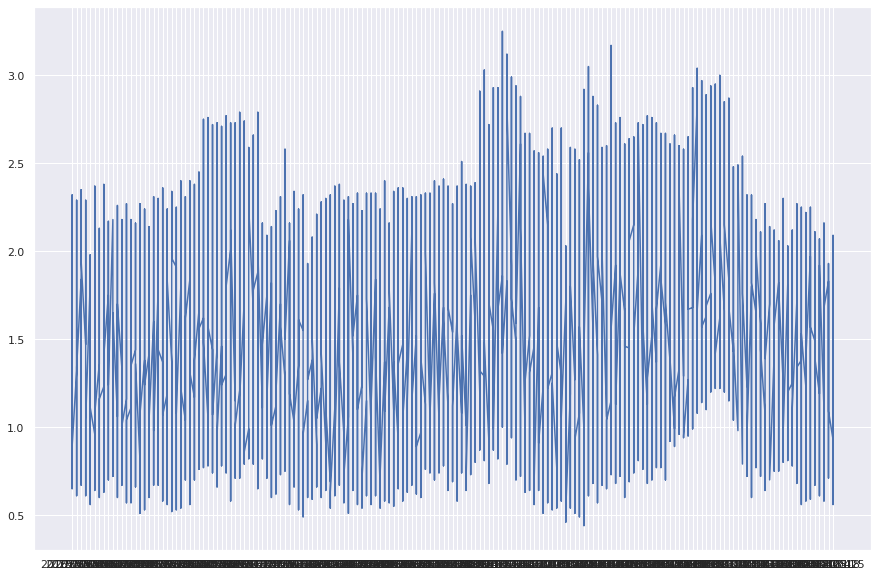

In [9]:
#visualizing Date vs AvaragePrice
plt.figure(figsize=(15,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

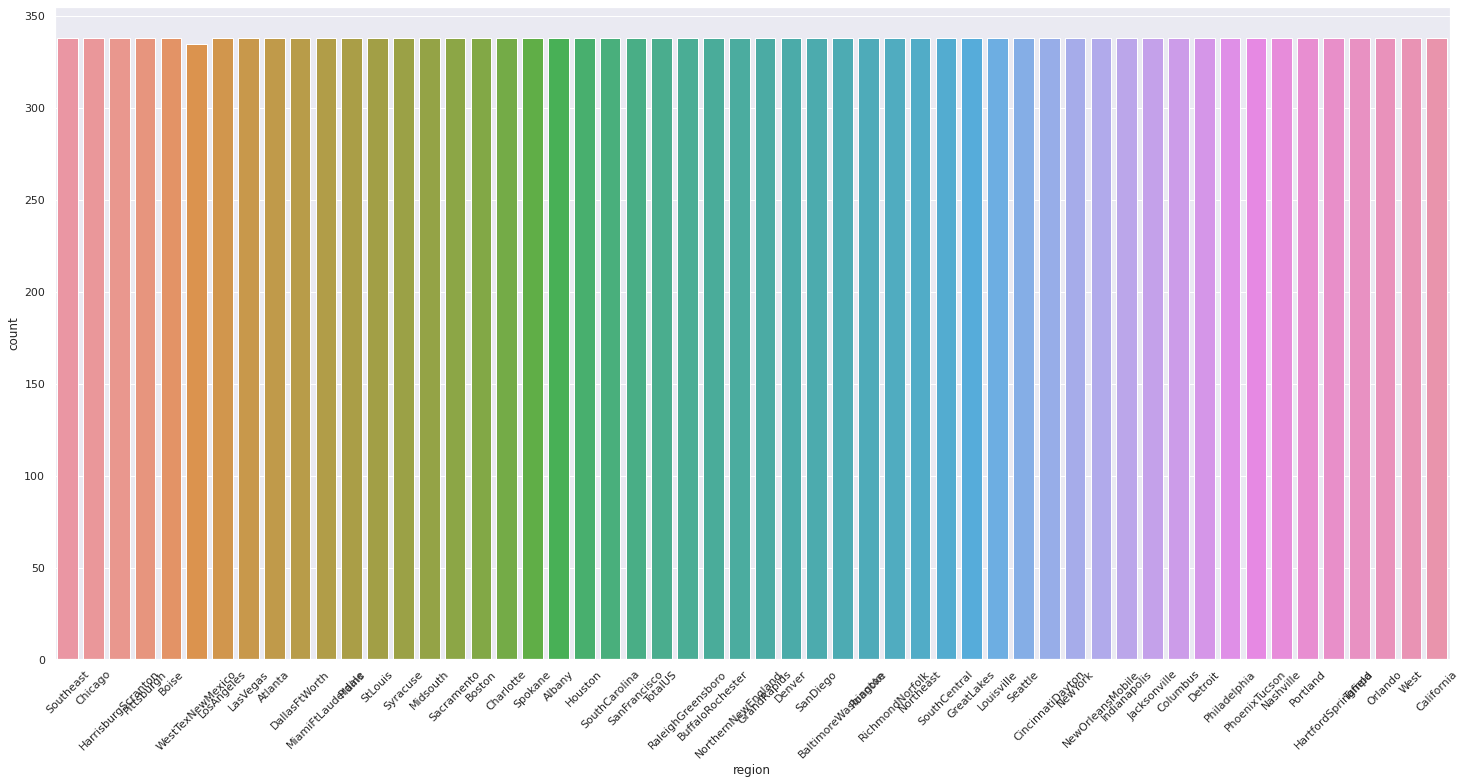

In [14]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

This chart indicates that our data is balanced based on regions.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

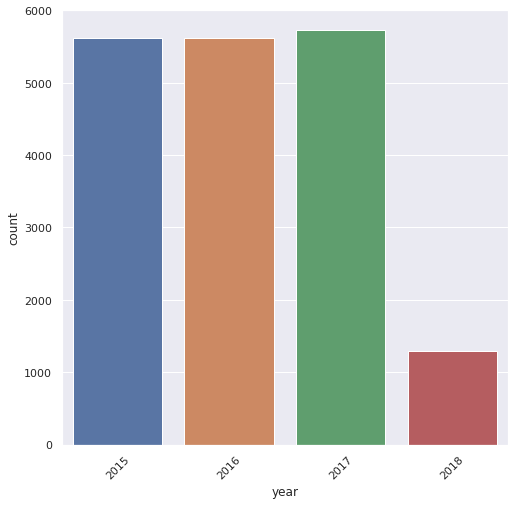

In [13]:
# Bar Chart to indicate the year
plt.figure(figsize=[8,8])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

In [15]:
#for our forcasting we need the following features
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']] 

#### **Market Predictions**

In [16]:
#we rename columns, becaouse in order to operate Prophet needs that format
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [17]:
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


#### **Model Training**

In [21]:
#Instantiated an object called m, and fit our data
model = Prophet()
model.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
# Forcasting into the future
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [23]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496497,0.911909,1.874572,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
1,2015-01-04,1.496497,0.914856,1.886419,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
2,2015-01-04,1.496497,0.883450,1.826821,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
3,2015-01-04,1.496497,0.838662,1.865180,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903
4,2015-01-04,1.496497,0.927547,1.856453,1.496497,1.496497,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,-0.112593,0.0,0.0,0.0,1.383903


In [24]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
18609,2019-03-21,1.161789,0.538472,1.611171,0.968903,1.337855,-0.086185,-0.086185,-0.086185,-0.086185,-0.086185,-0.086185,0.0,0.0,0.0,1.075605
18610,2019-03-22,1.161059,0.564396,1.586870,0.967186,1.337883,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,0.0,0.0,0.0,1.076534
18611,2019-03-23,1.160328,0.552206,1.597279,0.965055,1.338038,-0.082593,-0.082593,-0.082593,-0.082593,-0.082593,-0.082593,0.0,0.0,0.0,1.077735
18612,2019-03-24,1.159597,0.544455,1.595491,0.962925,1.338165,-0.080408,-0.080408,-0.080408,-0.080408,-0.080408,-0.080408,0.0,0.0,0.0,1.079190
18613,2019-03-25,1.158867,0.561773,1.592808,0.960794,1.338286,-0.077997,-0.077997,-0.077997,-0.077997,-0.077997,-0.077997,0.0,0.0,0.0,1.080870


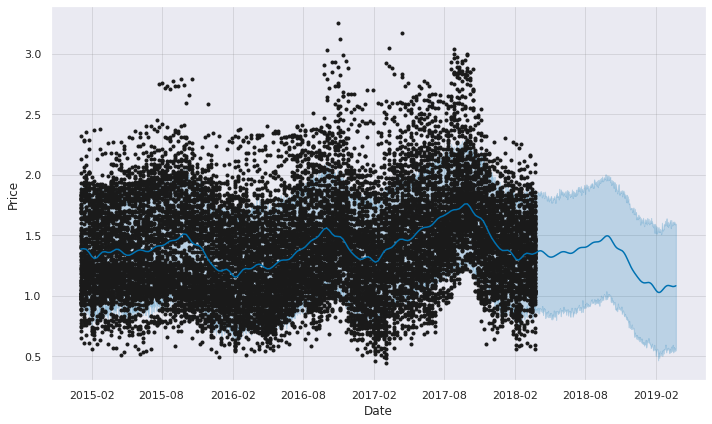

In [25]:
forecast_plot = m.plot(forecast, xlabel='Date', ylabel='Price')

Here we see an overall trend. As we see Price is going down. It gives you a Price bound in blue towordse Y axis, which is kind of range of values Price can take.

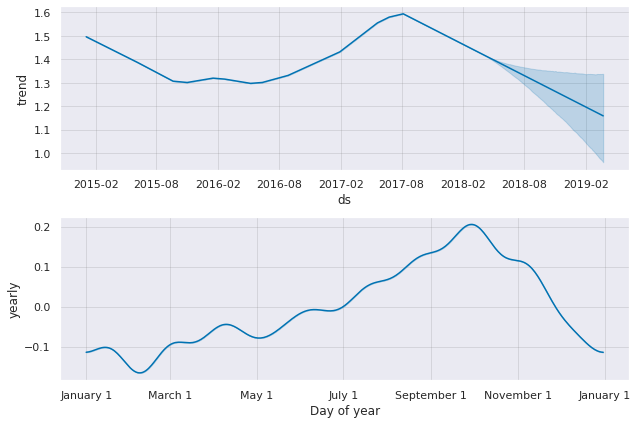

In [26]:
components_plot = m.plot_components(forecast)

Now, we want to do our prediction for a specific region.

In [27]:
avocado_df_2 = raw_data.copy()

In [28]:
avocado_df_2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [29]:
#creating new dataset for a specific region
avocado_df_sample = avocado_df_2[avocado_df_2['region']=='West']

In [30]:
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


In [31]:
avocado_df_sample = avocado_df_sample.sort_values("Date")

In [32]:
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


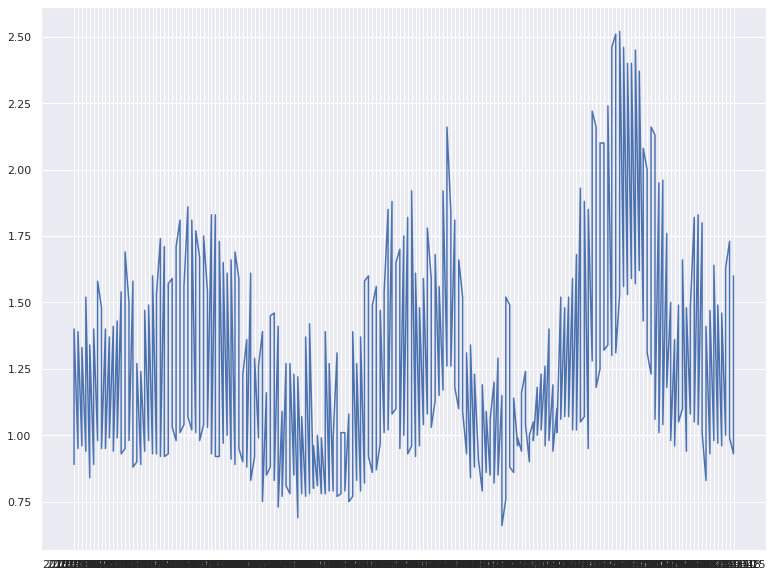

In [33]:
plt.figure(figsize=(13,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [34]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})

#### **Model Training**

In [37]:
model_2 = Prophet()
model_2.fit(avocado_df_sample)
# Forcasting into the future
future2 = model_2.make_future_dataframe(periods=365)
forecast2 = model_2.predict(future2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


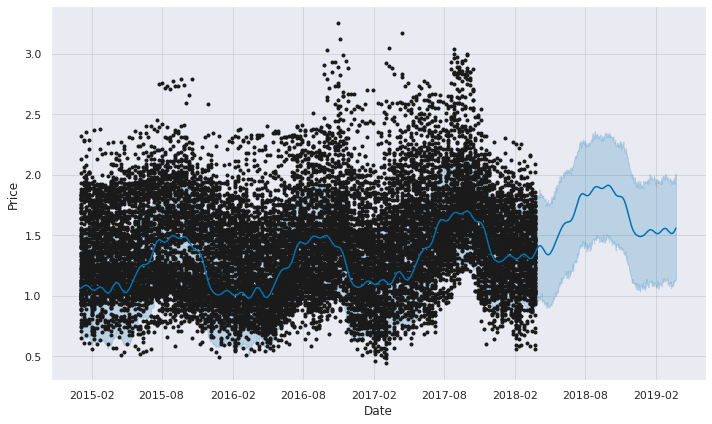

In [38]:
forcase_plot_2 = m.plot(forecast2, xlabel='Date', ylabel='Price')

As we see besides that for the entire market price is going down, for this specific region it is going up.

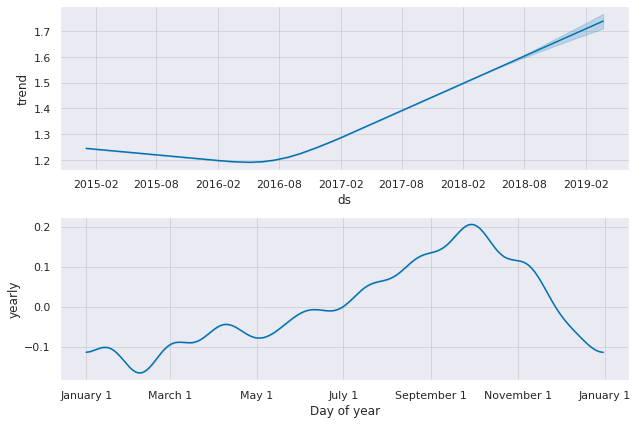

In [40]:
components_plot_2 = m.plot_components(forecast2)